In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from tiingo import TiingoClient

config = {}
config['session'] = True
config['api_key'] = os.environ['TIINGO_API_KEY']

client = TiingoClient(config)

def get_df_from_tiingo(symbol, start, end):
    df = pd.DataFrame(client.get_ticker_price(symbol,
                      startDate=start,
                      endDate=end,
                      frequency='daily'
                     ))
    df.set_index('date', inplace=True)
    df.index = pd.to_datetime(df.index)
    df.index = df.index.tz_localize('UTC')
    del df.index.name
    return df

In [2]:
symbol = 'AAPL'
start = '2016-01-01'
end = '2018-01-01'
prices = get_df_from_tiingo(symbol, start, end)

prices = prices.loc[:, ['adjClose', 'adjHigh', 'adjLow', 'adjOpen']]

In [3]:
prices.head()

,adjClose,adjHigh,adjLow,adjOpen
2016-01-04 00:00:00+00:00,101.011240,101.028499,97.799207,98.384085
2016-01-05 00:00:00+00:00,98.479967,101.490648,98.192322,101.394766
2016-01-06 00:00:00+00:00,96.552747,98.153969,95.756930,96.418513
2016-01-07 00:00:00+00:00,92.477780,96.006222,92.458604,94.615939
2016-01-08 00:00:00+00:00,92.966776,95.028230,92.775013,94.491293


In [4]:
def get_tr(cur, prev):
    """
    TR(True Range)
    """
    if prev != None:
        return max(
            cur.adjHigh - cur.adjLow,
            abs(cur.adjHigh - prev.adjClose),
            abs(cur.adjLow - prev.adjClose)
        )
    else:
        return cur.adjHigh - cur.adjLow

In [5]:
def get_tr_of_df(df):
    s_tr = pd.Series(index = df.index)
    
    prev = None
    for row in df.itertuples():
        tr = get_tr(row, prev)
        s_tr[row.Index] = tr
        prev = row

    return s_tr

In [6]:
s_tr = get_tr_of_df(prices)
prices['TR'] = s_tr

prices.head(40)

,adjClose,adjHigh,adjLow,adjOpen,TR
2016-01-04 00:00:00+00:00,101.011240,101.028499,97.799207,98.384085,3.229291
2016-01-05 00:00:00+00:00,98.479967,101.490648,98.192322,101.394766,3.298326
2016-01-06 00:00:00+00:00,96.552747,98.153969,95.756930,96.418513,2.723037
2016-01-07 00:00:00+00:00,92.477780,96.006222,92.458604,94.615939,4.094143
2016-01-08 00:00:00+00:00,92.966776,95.028230,92.775013,94.491293,2.550450
2016-01-11 00:00:00+00:00,94.472117,94.980289,93.331126,94.893996,2.013513
2016-01-12 00:00:00+00:00,95.843223,96.543159,94.769254,96.408925,2.071042
2016-01-13 00:00:00+00:00,93.379067,97.022567,93.292773,96.188397,3.729793
2016-01-14 00:00:00+00:00,95.421344,96.341807,91.797021,93.925592,4.544787
2016-01-15 00:00:00+00:00,93.129775,93.685888,91.432671,92.238076,3.988674


In [7]:
def get_atr_of_df(df, window=14):
    """
    ATR(Average True Range) 真实波动幅度均值
    https://en.wikipedia.org/wiki/Average_true_range
    """
    s_atr = pd.Series(index=df.index)
    win_sub_1 = window - 1
    
    prev_atr = None
    for idx, row in enumerate(df.itertuples()):
        if idx < win_sub_1:
            #s_atr[row.Index] = None
            pass
        if idx == win_sub_1:
            atr = df.loc[:row.Index, 'TR'].mean()
            s_atr[row.Index] = atr
            prev_atr = atr
        if idx > win_sub_1:
            tr = row.TR
            atr = ((prev_atr * (window - 1)) + tr) / window
            s_atr[row.Index] = atr
            prev_atr = atr
    return s_atr

In [8]:
s_atr = get_atr_of_df(prices, window=14)
prices['ATR'] = s_atr

prices.head(20)

,adjClose,adjHigh,adjLow,adjOpen,TR,ATR
2016-01-04 00:00:00+00:00,101.011240,101.028499,97.799207,98.384085,3.229291,NaN
2016-01-05 00:00:00+00:00,98.479967,101.490648,98.192322,101.394766,3.298326,NaN
2016-01-06 00:00:00+00:00,96.552747,98.153969,95.756930,96.418513,2.723037,NaN
2016-01-07 00:00:00+00:00,92.477780,96.006222,92.458604,94.615939,4.094143,NaN
2016-01-08 00:00:00+00:00,92.966776,95.028230,92.775013,94.491293,2.550450,NaN
2016-01-11 00:00:00+00:00,94.472117,94.980289,93.331126,94.893996,2.013513,NaN
2016-01-12 00:00:00+00:00,95.843223,96.543159,94.769254,96.408925,2.071042,NaN
2016-01-13 00:00:00+00:00,93.379067,97.022567,93.292773,96.188397,3.729793,NaN
2016-01-14 00:00:00+00:00,95.421344,96.341807,91.797021,93.925592,4.544787,NaN
2016-01-15 00:00:00+00:00,93.129775,93.685888,91.432671,92.238076,3.988674,NaN


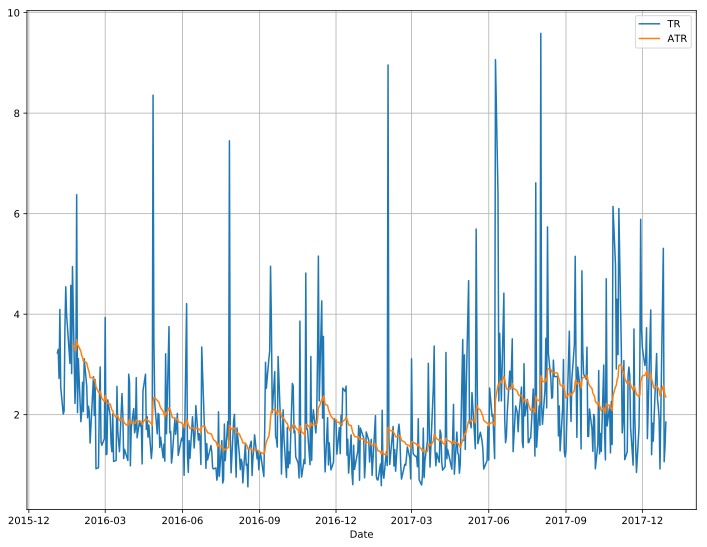

In [9]:
plt.plot(prices.TR)
plt.plot(prices.ATR)
plt.legend(['TR', 'ATR'])
plt.xlabel('Date');